In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.shape

(20640, 10)

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
df = df.drop(columns=["ocean_proximity"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipe_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(64, 32),
                         activation='relu',
                         max_iter=500,
                         random_state=42))
])

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

In [ ]:
print("Training LinearRegression...")
pipe_lr.fit(X_train, y_train)
print("Training MLPRegressor...")
pipe_mlp.fit(X_train, y_train)
print("Training RandomForestRegressor...")
rf.fit(X_train, y_train)

Training LinearRegression...
Training MLPRegressor...


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training RandomForestRegressor...


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
pred_lr = pipe_lr.predict(X_test)
pred_mlp = pipe_mlp.predict(X_test)
pred_rf = rf.predict(X_test)

In [ ]:
def metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

metrics_lr = metrics(y_test, pred_lr)
metrics_mlp = metrics(y_test, pred_mlp)
metrics_rf = metrics(y_test, pred_rf)

metrics_df = pd.DataFrame([
    metrics_lr, metrics_mlp, metrics_rf
], index=['LinearRegression','MLPRegressor','RandomForest']).reset_index().rename(columns={'index':'Model'})
print("\nModel metrics:")
print(metrics_df)


Model metrics:
              Model           MAE           MSE          RMSE        R2
0  LinearRegression  51372.672171  4.921881e+09  70156.120457  0.640087
1      MLPRegressor  46796.857238  4.304392e+09  65607.864969  0.685241
2      RandomForest  31953.780900  2.408424e+09  49075.700732  0.823884


In [ ]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop feature importances (RandomForest):")
print(feat_imp.head(10))


Top feature importances (RandomForest):
median_income         0.513330
longitude             0.165950
latitude              0.155981
housing_median_age    0.063416
population            0.034036
total_bedrooms        0.023914
total_rooms           0.023743
households            0.019630
dtype: float64


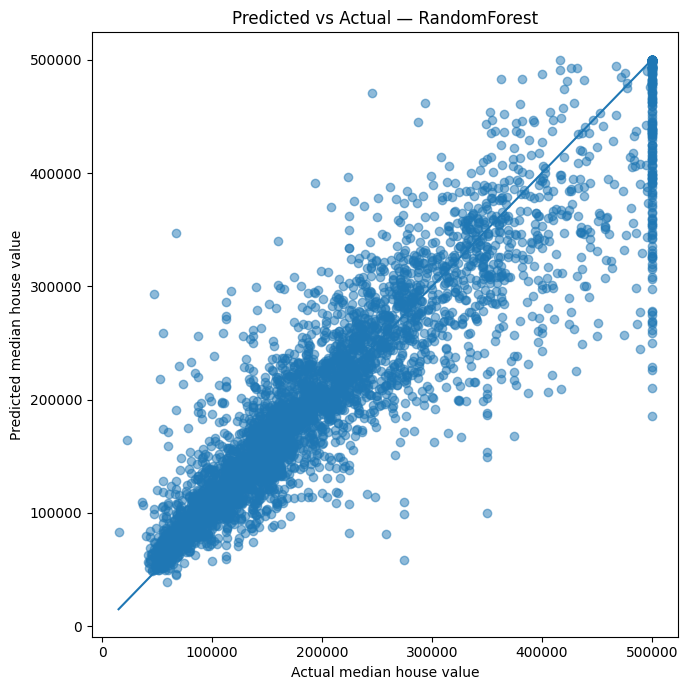

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, pred_rf, alpha=0.5)
minv = min(y_test.min(), pred_rf.min())
maxv = max(y_test.max(), pred_rf.max())
plt.plot([minv, maxv], [minv, maxv])
plt.xlabel("Actual median house value")
plt.ylabel("Predicted median house value")
plt.title("Predicted vs Actual — RandomForest")
plt.tight_layout()
plt.show()